In [1]:
import matplotlib.pyplot as plt
import cv2
import torch
import numpy as np
from datasets import CardsDataset
import os.path as osp
from augmentations import SSDAugmentation, BaseTransform

In [2]:
labels_names = ('background',
                'nine', 'ten', 'jack', 
                'queen', 'king', 'ace')
NUM_CLASSES = 7

def imshow(inp, boxes, labels, scores=None, thresh=None):
    if type(inp) == type(torch.Tensor()):
        inp = inp.numpy().transpose((1, 2, 0))
    inp = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10,10))
    plt.imshow(inp)
    plt.grid(False)
    
    currentAxis = plt.gca()
    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

    for i in range(len(labels)):
        box = boxes[i]
        label = labels[i].item()
        
        if thresh is not None:
            if scores[i] < thresh:
                continue
        
        pt = box.cpu().detach().numpy()
        label_name = labels_names[label]
        
        if scores is not None:
            score = scores[i]
            display_txt = '%s: %.2f'%(label_name, score)
        else:
            display_txt = '%s'%(label_name)
            
        coords = (pt[0], pt[1]), pt[2]-pt[0]+1, pt[3]-pt[1]+1
        color = colors[label]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(pt[0], pt[1], display_txt, bbox={'facecolor':color, 'alpha':0.5})     
        currentAxis.set_axis_off()
        
def demo(model, inp, thresh=0.5):    
    model.eval()
    prediction = model([inp])
    
    imshow(inp, prediction[0]['boxes'], prediction[0]['labels'], 
          prediction[0]['scores'], thresh)

In [3]:
from torchvision.models.detection import ssd300_vgg16 as ssd300

weights = 'weights/SSD300Final.pth'
model = ssd300(num_classes=NUM_CLASSES, pretrained_backbone=True)
model.load_state_dict(torch.load(weights))

D:\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


<All keys matched successfully>

In [4]:
from augmentations import ToTensor

img = cv2.imread('example.jpg')
transform = ToTensor()
img, _, _ = transform(img)

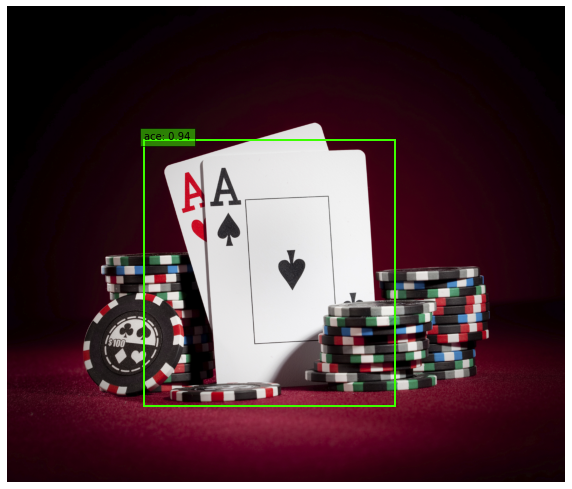

In [5]:
demo(model, img, 0.6)